*Implementing a perceptron using PyTorch*

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class Perception(nn.Module):
    """A perceptron is one linear layer"""
    
    def __init__(self, input_dim):
        """
        Args:
        input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """The forward pass of the perceptron
            Args:
            x_in (torch.Tensor): an input data tensor
            x_in.shape should be (batch, num_features)
            
            Returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## activation function

**sigmoid** 

$$f(x) = \frac{1}{1+e^{-x}}$$

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


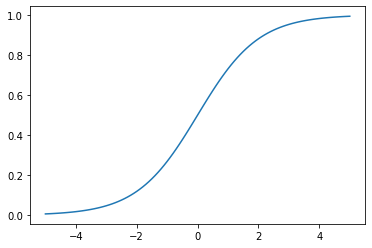

In [5]:
x = torch.range(-5.,5.,0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

从图中可以看出，sigmoid 对大部分输入来说饱和速度非常快，容易造成梯度消失和梯度爆炸问题（求导也可以说明），因此很少在输出层以外的网络层使用sigmoid函数

**Tanh**

$$ f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


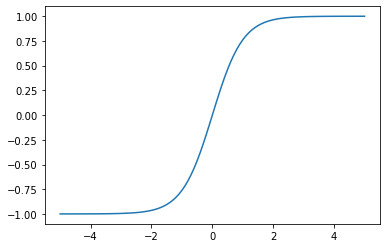

In [9]:
x = torch.range(-5.,5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

计算较为复杂，可以简单理解为是sigmoid 函数的线性变换

**ReLU**
$$f(x) = max(0, x)$$

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


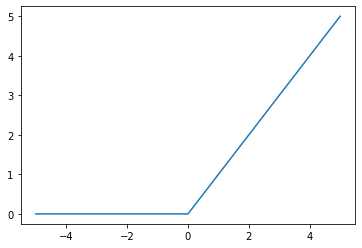

In [10]:
relu = torch.nn.ReLU()
x = torch.range(-5.,5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


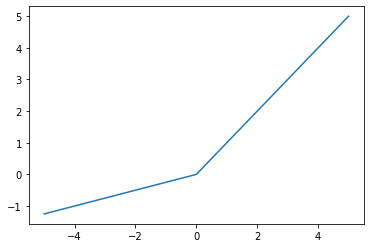

In [12]:
prelu = torch.nn.PReLU(num_parameters=1)

x = torch.range(-5.,5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

**softmax**

$$softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^{k}{e^{x_j}}}$$

In [13]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.3475, -2.4306, -1.1678]])
tensor([[0.7801, 0.0485, 0.1714]])
tensor([1.0000])


## loss function

**MSE**   mean squared error  
root mean squared error  **(RMSE)**,
$$ L_{MSE} = \frac{1}{n} \sum_{i=1}^{n}{(y-\hat{y})^2}$$

In [16]:
mse_loss = nn.MSELoss()
outputs = torch.zeros(3, 5, requires_grad=True)
targets = torch.ones(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1., grad_fn=<MseLossBackward>)


**Categorical Cross-Entropy Loss**
$$ L_{cross_entropy}(y, \hat{y}) = - \sum_{i}{y_i}log(\hat{y_i})$$

In [18]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(1.8125, grad_fn=<NllLossBackward>)


**Binary Cross-Entropy Loss  BCE**

In [20]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1
)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.2156],
        [0.7138],
        [0.6174],
        [0.2599]], grad_fn=<SigmoidBackward>)
tensor(0.8920, grad_fn=<BinaryCrossEntropyBackward>)
